In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PATH = "."
# Where to save the figures
def image_path(fig_id):
    return os.path.join(PATH, "images", fig_id)


def save_fig(fig_id, tight_layout=True):
    path = os.path.join (PATH,"images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [2]:
## setting up a graph to allow variables and constants and operations 

import tensorflow as tf

reset_graph()

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
f


<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [4]:
## Create a session  - this is where the graph will run (could be by device)  
## result is computation answer

sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

42


In [5]:
## Close of the session
sess.close()

In [6]:
## Set up some functions - Initialize
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()


In [7]:
result


42

In [8]:
## 
init = tf.global_variables_initializer()

In [9]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

42


In [10]:
sess.close()

In [11]:
result


42

In [12]:
## Getting the operations in the graph
for op in tf.get_default_graph().get_operations():
    print(str(op.name))

x/initial_value
x
x/Assign
x/read
y/initial_value
y
y/Assign
y/read
mul
mul_1
add
add_1/y
add_1
init
init_1


In [13]:
## Managing graphs - note that graph is added to default graph as a node.
reset_graph()

x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [14]:
## Add new graph independent of default graph
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)

x2.graph is graph

True

In [15]:
## confirm distinct from defaul graph
x2.graph is tf.get_default_graph()

False

In [16]:
## Define a simple graph  (note all calculations from scratch not stored )

w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    print(y.eval())  # 10
    print(z.eval())  # 15

10
15


In [17]:
## If you want to be more efficient with y and z - run in same session 
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)  # 10
    print(z_val)  # 15


10
15


In [18]:
## Try Linear Regression with Tensor Flow (California Housing)
## Fetch dataset
## Set-up Tensorflow
import tensorflow as tf

reset_graph()

import numpy as np
from sklearn.datasets import fetch_california_housing

## clear graph
reset_graph()

housing = fetch_california_housing()
m, n = housing.data.shape
## add bias to the data
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

## Calculate theta

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

## with tf.Session() as sess:
    ## theta_value = theta.eval()


In [19]:
with tf.Session() as sess:
    theta_value = theta.eval()


In [20]:
theta

<tf.Tensor 'MatMul_2:0' shape=(9, 1) dtype=float32>

In [21]:
theta_value

array([[-3.74659576e+01],
       [ 4.35208052e-01],
       [ 9.34183039e-03],
       [-1.05619654e-01],
       [ 6.38267040e-01],
       [-4.28281601e-06],
       [-3.77140474e-03],
       [-4.26884502e-01],
       [-4.40567464e-01]], dtype=float32)

In [22]:
## Pure Normal equatioj
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [23]:
## Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


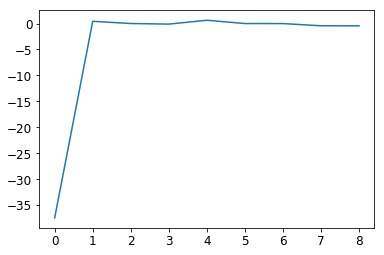

In [24]:
## Do some comparison plots????

plt.plot(theta_value)

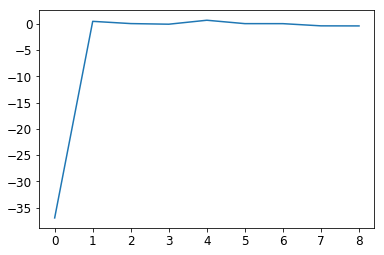

In [25]:
plt.plot(theta_numpy)

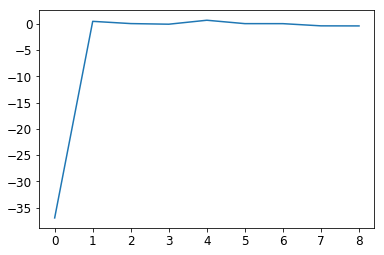

In [26]:
Alison= (np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])
plt.plot(Alison)

In [27]:
## When using Gradient Descent, remember that it is important to first normalize the input feature vectors, 
## or else training may be much slower. You can do this using TensorFlow, NumPy, Scikit-Learn’s StandardScaler, 
## or any other solution you prefer. 

## The following code is this normalization 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [28]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


In [29]:
## Manually compute the variants
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.71450025
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.55557173
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.5396291
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473


In [30]:
## The issue with the above is that it requires using the cost function (MSE) to derive the gradients.
## If we add the autodiff feature you can then  allow it to automatically calculate the gradients.
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")

In [31]:
gradients = tf.gradients(mse, [theta])[0]

In [32]:
## Note that it is doing the MatMul under the covers
gradients

<tf.Tensor 'gradients/predictions_grad/MatMul_1:0' shape=(9, 1) dtype=float32>

In [33]:
## Use the gradients in the training

training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555717
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.5396291
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401652]
 [-0.34770882]
 [ 0.3617837 ]
 [ 0.0039381 ]
 [-0.04269556]
 [-0.6614531 ]
 [-0.637528  ]]


In [34]:
## Tensor flow also provides optimizers
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")


In [35]:
## Use the TensorFlow Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

In [36]:
## Run with the optimizer in a session
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555717
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.5396291
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473
Best theta:
[[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401652]
 [-0.34770882]
 [ 0.3617837 ]
 [ 0.0039381 ]
 [-0.04269556]
 [-0.6614531 ]
 [-0.637528  ]]


In [37]:
## Try with a momementum optimizer ( sometimes converges faster)
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")


In [38]:
## use momentum optimizer
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)

In [39]:
## Set up session and initialize variables
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [40]:
## Run the session
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        sess.run(training_op)
    
    best_theta = theta.eval()

print("Best theta:")
print(best_theta)

Best theta:
[[ 2.068558  ]
 [ 0.82962847]
 [ 0.11875326]
 [-0.26554462]
 [ 0.30571103]
 [-0.00450251]
 [-0.03932662]
 [-0.89986503]
 [-0.87052166]]


In [41]:
## Okay so we know how to create a graph and use optimizers, but we need
## to create "feeds to the graph" of data so we can run "mini-batches" of gradient descent
## So "X" and "y" will need to be replaced iteratively with new data with placeholders
## Placeholder must have correct shape but does not have to contain actual data values.
reset_graph()

A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})

print(B_val_1)


[[6. 7. 8.]]


In [42]:
## All there? 
print(B_val_2)

[[ 9. 10. 11.]
 [12. 13. 14.]]


In [43]:
## Run mini-batches
## Set parameters
n_epochs = 1000
learning_rate = 0.01

In [44]:
## set-up placeholders
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

In [45]:
## Set-up graph and initialize variables
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()



In [46]:
## Set test run of epochs
n_epochs = 10

In [47]:
## Set up batching
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [48]:
## Create function to fetch batches
def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)  # not shown in the book
    indices = np.random.randint(m, size=batch_size)  # not shown
    X_batch = scaled_housing_data_plus_bias[indices] # not shown
    y_batch = housing.target.reshape(-1, 1)[indices] # not shown
    return X_batch, y_batch

## run session with batch feeds with epochs of 10 and indexing up the batches
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

In [49]:
## New best theta
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255149],
       [-0.31211883],
       [ 0.38510382],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

In [50]:
## Saving parameters to disk so you don't need to recode...or can re-use
reset_graph()

n_epochs = 1000                                                                       # not shown in the book
learning_rate = 0.01                                                                  # not shown

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")            # not shown
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")            # not shown
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")                                      # not shown
error = y_pred - y                                                                    # not shown
mse = tf.reduce_mean(tf.square(error), name="mse")                                    # not shown
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)            # not shown
training_op = optimizer.minimize(mse)                                                 # not shown

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())                                # not shown
            save_path = saver.save(sess, "/tmp/my_model.ckpt")
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final.ckpt")


Epoch 0 MSE = 9.16154
Epoch 100 MSE = 0.71450037
Epoch 200 MSE = 0.56670487
Epoch 300 MSE = 0.5555717
Epoch 400 MSE = 0.5488112
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.5396291
Epoch 700 MSE = 0.5365092
Epoch 800 MSE = 0.53406775
Epoch 900 MSE = 0.5321473


In [51]:
## Theta results
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401652],
       [-0.34770882],
       [ 0.3617837 ],
       [ 0.0039381 ],
       [-0.04269556],
       [-0.6614531 ],
       [-0.637528  ]], dtype=float32)

In [52]:
## Restore a model and run it.
with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")
    best_theta_restored = theta.eval() # not shown in the book

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [53]:
## confirm data is close
np.allclose(best_theta, best_theta_restored)

True

In [54]:
## passing output from one model to another (like "weights")
saver = tf.train.Saver({"weights": theta})

In [55]:
## By default the saver also saves the graph structure itself in a second file with the extension .meta.
## You can use the function tf.train.import_meta_graph() to restore the graph structure. 
## This function loads the graph into the default graph and returns a Saver that can then be used 
## to restore the graph state (i.e., the variable values):

reset_graph()
# notice that we start with an empty graph.

saver = tf.train.import_meta_graph("/tmp/my_model_final.ckpt.meta")  # this loads the graph structure
theta = tf.get_default_graph().get_tensor_by_name("theta:0") # not shown in the book

with tf.Session() as sess:
    saver.restore(sess, "/tmp/my_model_final.ckpt")  # this restores the graph's state
    best_theta_restored = theta.eval() # not shown in the book

INFO:tensorflow:Restoring parameters from /tmp/my_model_final.ckpt


In [56]:
## Verify no loss
np.allclose(best_theta, best_theta_restored)

True

In [57]:
## Draw the graph  - Hmm Tensorboard is now part of TensorFlow apparently so no importing
## Let's see if we can make the code work.
## Set up time lines so we can time-stamp each model run
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)


In [58]:
## Set up graph, parameters and variables
n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [59]:
##  Set-up to scale MSE and write files  (Tensorboard wants files on disk)
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [60]:
## Set-up batching
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [61]:
## Run the session
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()                                                     # not shown

In [62]:
## Stop writing to disk
file_writer.close()

In [63]:
## View output 
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255149],
       [-0.31211883],
       [ 0.38510382],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

In [64]:
### Note the next steps create a log directory and write events
## So now we need to find working directory
import os
print(os.getcwd())

/Users/udoucal/Desktop/MLFiles/projects/Tensor-Flow-Set-up


In [65]:
## Using Name Scopes to group related nodes
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

n_epochs = 1000
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")


In [66]:
with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name="mse")

In [67]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [68]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.0703337 ]
 [ 0.8637145 ]
 [ 0.12255149]
 [-0.31211883]
 [ 0.38510382]
 [ 0.00434168]
 [-0.01232954]
 [-0.83376896]
 [-0.8030471 ]]


In [69]:
print(error.op.name)

loss/sub


In [70]:
print(mse.op.name)

loss/mse


In [71]:
## Roll your own ReLU:
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")

w1 = tf.Variable(tf.random_normal((n_features, 1)), name="weights1")
w2 = tf.Variable(tf.random_normal((n_features, 1)), name="weights2")
b1 = tf.Variable(0.0, name="bias1")
b2 = tf.Variable(0.0, name="bias2")

z1 = tf.add(tf.matmul(X, w1), b1, name="z1")
z2 = tf.add(tf.matmul(X, w2), b2, name="z2")

relu1 = tf.maximum(z1, 0., name="relu1")
relu2 = tf.maximum(z1, 0., name="relu2")  # Oops, cut&paste error! Did you spot it?

output = tf.add(relu1, relu2, name="output")

In [72]:
## Use a function to build the ReLU:
reset_graph()

def relu(X):
    w_shape = (int(X.get_shape()[1]), 1)
    w = tf.Variable(tf.random_normal(w_shape), name="weights")
    b = tf.Variable(0.0, name="bias")
    z = tf.add(tf.matmul(X, w), b, name="z")
    return tf.maximum(z, 0., name="relu")

n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

In [73]:
## Write the data 
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())

In [74]:
## Add name scoping

reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")    # not shown
        b = tf.Variable(0.0, name="bias")                             # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                      # not shown
        return tf.maximum(z, 0., name="max")                          # not shown

In [75]:
## Run again
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2", tf.get_default_graph())
file_writer.close()

In [76]:
## Sharing variables
## Sharing a threshold variable the classic way, 
## by defining it outside of the relu() function then passing it as a parameter.
## Variable named "threshold"
reset_graph()

def relu(X, threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

threshold = tf.Variable(0.0, name="threshold")
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X, threshold) for i in range(5)]
output = tf.add_n(relus, name="output")

In [77]:
## Using the variable
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu, "threshold"):
            relu.threshold = tf.Variable(0.0, name="threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown in the book
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, relu.threshold, name="max")

In [78]:
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

In [79]:
## Using "get variable" from tensorflow
reset_graph()

with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))

In [80]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

In [81]:
with tf.variable_scope("relu", reuse=True):
    threshold = tf.get_variable("threshold")

In [82]:
##Now you have all the pieces you need to make the relu() 
## function access the threshold variable without having to pass it as a parameter:
reset_graph()

def relu(X):
    with tf.variable_scope("relu", reuse=True):
        threshold = tf.get_variable("threshold")
        w_shape = int(X.get_shape()[1]), 1                          # not shown
        w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
        b = tf.Variable(0.0, name="bias")                           # not shown
        z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu"):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
relus = [relu(X) for relu_index in range(5)]
output = tf.add_n(relus, name="output")

In [83]:
## Write the data
file_writer = tf.summary.FileWriter("logs/relu6", tf.get_default_graph())
file_writer.close()

In [84]:
## No idea what this is...
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name="weights")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X, w), b, name="z")
        return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("", default_name="") as scope:
    first_relu = relu(X)     # create the shared variable
    scope.reuse_variables()  # then reuse it
    relus = [first_relu] + [relu(X) for i in range(4)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu8", tf.get_default_graph())
file_writer.close()

In [85]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
    b = tf.Variable(0.0, name="bias")                           # not shown
    z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = []
for relu_index in range(5):
    with tf.variable_scope("relu", reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))
output = tf.add_n(relus, name="output")

In [86]:
file_writer = tf.summary.FileWriter("logs/relu9", tf.get_default_graph())
file_writer.close()